In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from src.california_housing import read_data
from src.california_housing import preprocess_train

# Load Data

In [2]:
# Read train data
df_train = read_data.read_file(folder="california_housing",filename="strat_train_set_adjusted", csv=True)
# Read test data
df_test = read_data.read_file(folder="california_housing",filename="strat_test_set_adjusted", csv=True)

# Preprocess Data

In [3]:
# Create train variables
X_train = preprocess_train.data_preprocessing(df_train)
y_train = df_train[['median_house_value']].values.ravel()

In [4]:
# Create test variables
X_test = preprocess_train.data_preprocessing(df_test)
y_test = df_test[['median_house_value']].values.ravel()

# Get Linear Regression Model and make Predictions

#### Get Model

In [5]:
# Get the best linear model
lin_reg_model = preprocess_train.train_linear_regression(X=X_train, y=y_train)

Best Parameters:  {'fit_intercept': False, 'positive': False}


#### Make predictions

In [6]:
# Predict using the trained model
y_pred = lin_reg_model.predict(X_test)

In [8]:
# Compute Residuals
residuals = y_test - y_pred

In [9]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Print results
print(f'Mean Squared Error (MSE): {round(mse,0)}')
print(f'Root Mean Squared Error (RMSE): {round(rmse,0)}')
print(f'Mean Absolute Error (MAE): {round(mae,0)}')
print(f'R-squared (R2) Score: {round(r2,2)}')

Mean Squared Error (MSE): 3834620717.0
Root Mean Squared Error (RMSE): 61924.0
Mean Absolute Error (MAE): 48317.0
R-squared (R2) Score: 0.57


# Visualise Results

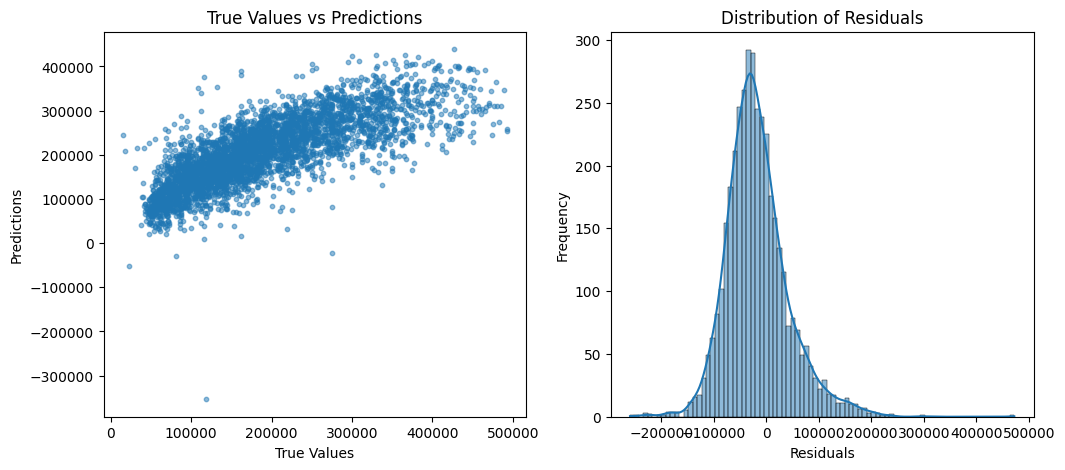

In [11]:
# Visualize results
plt.figure(figsize=(12, 5))

# Scatter plot of true vs predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, s=10)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True Values vs Predictions')

# Residuals plot
plt.subplot(1, 2, 2)
# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()